In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error ,median_absolute_error, max_error, r2_score
from sklearn.inspection import permutation_importance

In [2]:
### IMPORTANDO OS DADOS ###

X_test = pd.read_csv('X_test.csv', sep=';')
X_test = X_test[['dia_bimestre', 'semana_letiva', 'dia_letivo', 'temp_min']]
y_test = pd.read_csv('y_test.csv', sep=';')
y_test = y_test[['jantar']]
X_train = pd.read_csv('X_train.csv', sep=';')
X_train = X_train[['dia_bimestre', 'semana_letiva', 'dia_letivo', 'temp_min']]
y_train = pd.read_csv('y_train.csv', sep=';')
y_train = y_train[['jantar']]

In [3]:
### NORMALIZANDO TODOS OS DATAFRAMES ###

scaler = MinMaxScaler(feature_range=(0,10))
scaler_X_test = MinMaxScaler(feature_range=(0,10))
scaler_y_test = MinMaxScaler(feature_range=(0,10))

c_names_X = X_train.columns
c_names_y = y_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=c_names_X)

scaler = MinMaxScaler(feature_range=(0,10))

y_train = scaler.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=c_names_y)

X_test = scaler_X_test.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=c_names_X)

y_test = scaler_y_test.fit_transform(y_test)
y_test = pd.DataFrame(y_test, columns=c_names_y)

In [4]:
#########################################################################################################
################          APLICACAO DO GRIDSEARCH        OPCIONAL               #########################
#########################################################################################################

param_rbf = {'kernel' : ['rbf'], 'C' : [0.01, 0.1, 1.0, 2, 5, 10, 20], 'epsilon' : [0.01, 0.1, 0.5, 1, 2, 4], 'gamma' : ['auto','scale']}
param_lin = {'kernel' : ['linear'], 'C' : [0.01, 0.1, 1.0, 2, 5, 10, 20], 'epsilon' : [0.01, 0.1, 0.5, 1, 2, 4]}
param_poly = {'kernel' : ['poly'], 'C' : [0.01, 0.1, 0.5, 1, 2, 5, 10, 20], 'epsilon' : [0.01, 0.1, 0.5, 1, 2, 4], 'coef0' : [0, 0.01,0.1,0.5, 1], 'degree' : [3, 4, 5, 6]}
param_sig = {'kernel' : ['sigmoid'], 'C' : [0.01, 0.1, 1.0, 2, 5, 10, 20], 'epsilon' : [0.01, 0.1, 0.5, 1, 2, 4], 'gamma' : ['auto','scale'], 'coef0' : [0, 0.01,0.1,0.5, 1]}

modelsvr = SVR()

metricas = ['r2', 'explained_variance']

kf= KFold(n_splits = 5, shuffle = True, random_state = 42)

grid = GridSearchCV(modelsvr, param_poly, scoring=metricas, refit='r2', return_train_score=False, verbose = 100, cv=kf)

grid.fit(X_train, y_train)

pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_r2', axis=0, ascending=False)[['params','param_epsilon','mean_test_r2','split0_test_r2','split1_test_r2','split2_test_r2','split3_test_r2','split4_test_r2']]

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.585, r2=0.578, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.495, r2=0.489, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.608, r2=0.551, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=3, epsilon=0.01, kernel=poly ............
[

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly, explained_variance=0.612, r2=0.595, total=   0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly, explained_variance=0.434, r2=0.431, total=   0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=4, epsilon=1, kernel=poly, explained_variance=0.682, r2=0.682, total=   0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=4, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=4, epsilon=2, kernel=poly, explained_varianc

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    0.3s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly, explained_variance=0.553, r2=0.507, total=   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.3s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly, explained_variance=0.379, r2=0.367, total=   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.3s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=5, epsilon=2, kernel=poly, explained_variance=0.647, r2=0.642, total=   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.3s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=5, epsilon=4, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=5, epsilon=4, kernel=poly, explained_varianc

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.451, r2=0.449, total=   0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.5s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.583, r2=0.564, total=   0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.5s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.346, r2=0.334, total=   0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.5s remaining:    0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=0, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.714, r2=0.700, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=0.5, kernel=poly .............
[CV]  C=0.01, coef0=0, degree=6, epsilon

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0, degree=6, epsilon=1, kernel=poly, explained_variance=0.528, r2=0.512, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=1, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=6, epsilon=1, kernel=poly, explained_variance=0.445, r2=0.439, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=1, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=6, epsilon=1, kernel=poly, explained_variance=0.727, r2=0.722, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly, explained_variance=0.532, r2=0.472, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly, explained_variance=0.379, r2=0.369, total=   0.0s
[CV] C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly ...............
[CV]  C=0.01, coef0=0, degree=6, epsilon=2, kernel=poly, explained_variance=0.573, r2=0.524, total=   0.0s
[CV

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.01, degree=3, epsilon=2, kernel=poly, explained_variance=0.575, r2=0.568, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=3, epsilon=2, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=3, epsilon=2, kernel=poly, explained_variance=0.381, r2=0.378, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=3, epsilon=2, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=3, epsilon=2, kernel=poly, explained_variance=0.521, r2=0.521, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly, explained_variance=0.414, r2=0.412, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly, explained_variance=0.401, r2=0.392, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=3, epsilon=4, kernel=poly, explained_variance=0.455, r2=0.284,

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly, explained_variance=0.399, r2=0.398, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly, explained_variance=0.601, r2=0.581, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly, explained_variance=0.380, r2=0.369, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.1, kernel=poly, explained_variance=0.712, r2=0.705, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=5, epsilon=0.5, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.5, kernel=poly, explained_variance=0.549, r2=0.523, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=5, epsilon=0.5, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=5, epsilon=0.5, kernel=poly, explained_variance=0.43

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.331, r2=0.320, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.01, kernel=poly .........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.720, r2=0.709, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.379, r2=0.343, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.458, r2=0.455, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.618, r2=0.598, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.578, r2=0.557, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.5, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.409, r2=0.392, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=0.5, kernel=poly ..........
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.774, r2=0.764, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly, explained_variance=0.620, r2=0.539, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly, explained_variance=0.466, r2=0.455, total=   0.0s
[CV] C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly ............
[CV]  C=0.01, coef0=0.01, degree=6, epsilon=1, kernel=poly, explained_variance=0.516, r2=

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.504, r2=0.498, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.615, r2=0.567, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.405, r2=0.400, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.01, kernel=poly, explained_variance=0.602, r2=0.590, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.592, r2=0.580, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.509,

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[CV] C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly, explained_variance=0.614, r2=0.586, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly, explained_variance=0.424, r2=0.390, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly, explained_variance=0.577, r2=0.536, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly, explained_variance=0.371, r2=0.371, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=4, epsilon=2, kernel=poly, explained_variance=0.569, r2=0.564, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.1, deg

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.1, degree=5, epsilon=4, kernel=poly, explained_variance=0.159, r2=-0.229, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=5, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=5, epsilon=4, kernel=poly, explained_variance=0.407, r2=0.275, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.423, r2=0.386, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.476, r2=0.473, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.644, r2=0.632, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.338, r2

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.635, r2=0.624, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.334, r2=0.323, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.724, r2=0.705, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.610, r2=0.539, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.501, r2=0.499, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.587, r2=

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly, explained_variance=0.615, r2=0.509, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly, explained_variance=0.469, r2=0.458, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly, explained_variance=0.503, r2=0.492, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly, explained_variance=0.472, r2=0.469, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=1, kernel=poly, explained_variance=0.760, r2=0.757, total=   0.0s
[CV] C=0.01, coef0=0.1, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.1, degree=6, epsilon=2, kernel=poly, explained_variance=0.524, r2=0.459, total

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.531, r2=0.527, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.636, r2=0.592, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.418, r2=0.410, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=3, epsilon=0.1, kernel=poly, explained_variance=0.623, r2=0.606, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=3, epsilon=0.5, kernel=poly, explained_variance=0.615, r2=0.600, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=3, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[CV] C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly, explained_variance=0.393, r2=0.391, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly, explained_variance=0.395, r2=0.386, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly, explained_variance=0.450, r2=0.268, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly, explained_variance=0.177, r2=-0.206, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=4, epsilon=4, kernel=poly, explained_variance=0.380, r2=0.258, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=5, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.5, de

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.475, r2=0.473, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.643, r2=0.636, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.329, r2=0.320, total=   0.1s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly ..........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.01, kernel=poly, explained_variance=0.765, r2=0.757, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.580, r2=0.534, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.502,

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.340, r2=0.331, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.1, kernel=poly, explained_variance=0.772, r2=0.767, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.561, r2=0.478, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.492, r2=0.491, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.608, r2=0.598, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly ...........
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=0.5, kernel=poly, explained_variance=0.397, r2=

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

[CV]  C=0.01, coef0=0.5, degree=6, epsilon=1, kernel=poly, explained_variance=0.794, r2=0.792, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly, explained_variance=0.498, r2=0.411, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly, explained_variance=0.380, r2=0.369, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly, explained_variance=0.596, r2=0.514, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly, explained_variance=0.345, r2=0.320, total=   0.0s
[CV] C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly .............
[CV]  C=0.01, coef0=0.5, degree=6, epsilon=2, kernel=poly, explained_variance=0.673, r2=0.670, total

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p


[CV] C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly, explained_variance=0.699, r2=0.681, total=   0.0s
[CV] C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly, explained_variance=0.394, r2=0.380, total=   0.0s
[CV] C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly ............
[CV]  C=0.01, coef0=1, degree=4, epsilon=0.01, kernel=poly, explained_variance=0.750, r2=0.738, total=   0.0s
[CV] C=0.01, coef0=1, degree=4, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=1, degree=4, epsilon=0.1, kernel=poly, explained_variance=0.554, r2=0.547, total=   0.0s
[CV] C=0.01, coef0=1, degree=4, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=1, degree=4, epsilon=0.1, kernel=poly, explained_variance=0.519, r2=0.513, total=   0.0s
[CV] C=0.01, coef0=1, degree=4, epsilon=0.1, kernel=poly .............
[CV]  C=0.01, coef0=1, de

c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\renan dias\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.p

KeyboardInterrupt: 

SVR(C=0.01, coef0=1, epsilon=1, kernel='poly')
R^2 score: 0.5467139961083702
erro absoluto médio: 61.85317675621139
erro quadrático médio:: 6432.506656742095
erro absoluto mediano: 41.28062789138238
erro máximo: 189.64143328569108
erro absoluto médio excedente: 41.885886399163276
erro absoluto médio de falta: 81.82046711325951
erro absoluto mediano excedente: 32.80343275950656
erro absoluto mediano de falta: 74.3343159417962
erro máximo pra mais: 189.64143328569108
erro máximo pra menos: 172.95134391258188


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


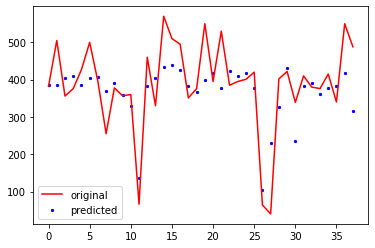

In [4]:
#########################################################################################################
################                   APLICACAO DO MODELO E RESULTADOS             #########################
#########################################################################################################

svr_poly = SVR(kernel='poly', C=0.01, gamma='scale', degree=3, epsilon=1, coef0=1)

print(svr_poly)
y_pred = svr_poly.fit(X_train, y_train).predict(X_test)


y_pred = scaler_y_test.inverse_transform(y_pred.reshape(-1,1))
y_test_original = scaler_y_test.inverse_transform(y_test)

y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['jantar']

y_test_original = pd.DataFrame(y_test_original)
y_test_original.columns = ['jantar']

print('R^2 score: {}'.format(r2_score(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto médio: {}'.format(mean_absolute_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro quadrático médio:: {}'.format(mean_squared_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto mediano: {}'.format(median_absolute_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro máximo: {}'.format(max_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto médio excedente: {}'.format(mean_absolute_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro absoluto médio de falta: {}'.format(mean_absolute_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))
print('erro absoluto mediano excedente: {}'.format(median_absolute_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro absoluto mediano de falta: {}'.format(median_absolute_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))
print('erro máximo pra mais: {}'.format(max_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro máximo pra menos: {}'.format(max_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))

x = range(y_pred.size)
plt.scatter(x, y_pred, s=5, color="blue", label="predicted")
plt.plot(x, y_test_original, lw=1.5, color="red", label="original")
plt.legend()
plt.show()

In [5]:
### PERMUTATION FEATURE IMPORTANCE ###

teste = svr_poly.fit(X_train, y_train)
r = permutation_importance(teste, X_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
        print(f"{X_test.columns[i]:<15}"
            '      'f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


dia_bimestre         0.337 +/- 0.141
dia_letivo           0.248 +/- 0.108
semana_letiva        0.210 +/- 0.095
temp_min             0.091 +/- 0.042
